<a href="https://colab.research.google.com/github/jbngcrs03/Data-Science-Projects/blob/main/Indian_Cuisine%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
pd.set_option('display.max_rows', None)

In [97]:
df = pd.read_csv(r'/content/sample_data/DSDP - indian_food.csv')
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


# Data Cleaning and preparation

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [99]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


the lowest value is -1 which is not necessary because there is no negative values in preparing and cooking. To replace this

In [100]:
diet = df['diet'].unique()
flavor_profile = df['flavor_profile'].unique()
course = df['course'].unique()
state = df['state'].unique()
region = df['region'].unique()
print('Diet:',diet)
print('flavor_profile:',flavor_profile)
print('course:',course)
print('state:',state)
print('region:',region)

Diet: ['vegetarian' 'non vegetarian']
flavor_profile: ['sweet' 'spicy' 'bitter' '-1' 'sour']
course: ['dessert' 'main course' 'starter' 'snack']
state: ['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
region: ['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]


Also in categorical data, there is also a '-1' value which we needed to clean.

We gonna replace these '-1' by its mean,median and mode but we must check first if there is skewness. 

<Axes: xlabel='cook_time', ylabel='Density'>

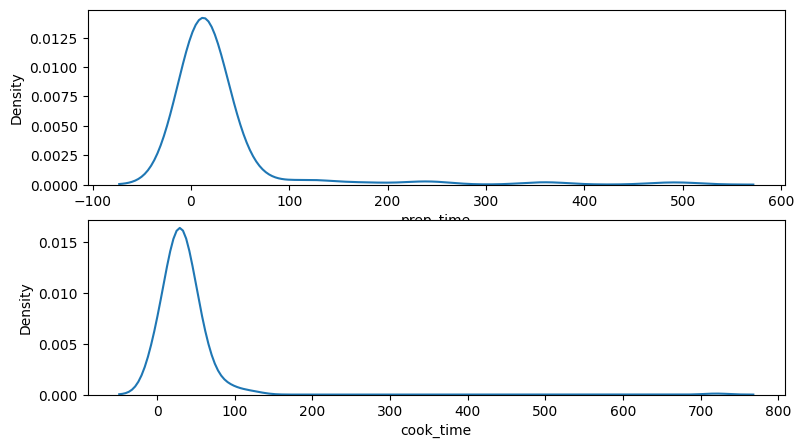

In [101]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.kdeplot(df['prep_time'])

plt.subplot(212)
sns.kdeplot(df['cook_time'])

Its clearly that there is no skewness because of that we gonna replace the numerical value -1 with the mean of its column 

prep_time & cook_time = -1 replaced with its mean

For the other column with categorical data will replace the -1 with its mode except from the colum state and region because there values are correlated to each other.Instead we gonna use forward fill in order to match the replacement value to their respective categories. For reference, see the grouping below 





In [102]:
groupby_region = df.groupby('region').aggregate('state').value_counts()
df2 = pd.DataFrame(groupby_region)
df2

state
region     state                 
-1         -1                  13
Central    Madhya Pradesh       2
           Chhattisgarh         1
East       West Bengal         24
           Odisha               7
North      Punjab              32
           Uttar Pradesh        8
           Bihar                3
           Jammu & Kashmir      2
           -1                   1
           Haryana              1
           NCT of Delhi         1
           Uttarakhand          1
North East Assam               21
           Manipur              2
           Nagaland             1
           Tripura              1
South      Tamil Nadu          20
           -1                  10
           Andhra Pradesh      10
           Kerala               8
           Karnataka            6
           Telangana            5
West       Gujarat             35
           Maharashtra         30
           Rajasthan            6
           Goa                  3

In [103]:
#Identify the mode of each column
flavor_profile = df['flavor_profile'].mode()
course = df['course'].mode()

print('flavor_profile:',flavor_profile)
print('course:',course)


flavor_profile: 0    spicy
Name: flavor_profile, dtype: object
course: 0    main course
Name: course, dtype: object


In [104]:
#Data Cleaning and Transformatioon
#Changing Data types
df['course'] = df['course'].astype('string')
df['flavor_profile'] = df['flavor_profile'].astype('string')
df['state'] = df['state'].astype('string')
df['region'] = df['region'].astype('string')
df['cook_time'] = df['cook_time'].astype('int')
df['prep_time'] = df['prep_time'].astype('int')

#Data Imputation
df['prep_time'] = df['prep_time'].replace(-1, df['prep_time'].mean())
df['cook_time'] = df['cook_time'].replace(-1, df['cook_time'].mean())
df['flavor_profile'] = df['flavor_profile'].replace('-1', 'spicy')
df['course'] = df['course'].replace('-1', 'main course')
df['state'].fillna('-1')
df['state'] = df['state'].replace('-1',np.nan)
df['region'] = df['region'].replace('-1',np.nan)
df['state'] = df['state'].ffill()
df['region'] = df['region'].ffill()
df.to_csv('Cleaned_DSDP_indian_cuisine.csv')


# Exploratory Data Analysis 

In [105]:
df['no_of_ingredients'] = df['ingredients'].apply(lambda x: len(x.split(',')))
df['ingredients_1'] = df['ingredients'].str.split(',')

There some dishes that uses same ingredients. (Reference Above)

These dishes are: 

Boondi & Laddu = Gram flour, ghee, sugar

Chenna jalebi & Ledikeni = Chhena, sugar, ghee 

Patra & Pattor = Arbi ke patte, sesame seeds, gur, bengal gram flour, imli  


Text(0, 0.5, 'Frequency')

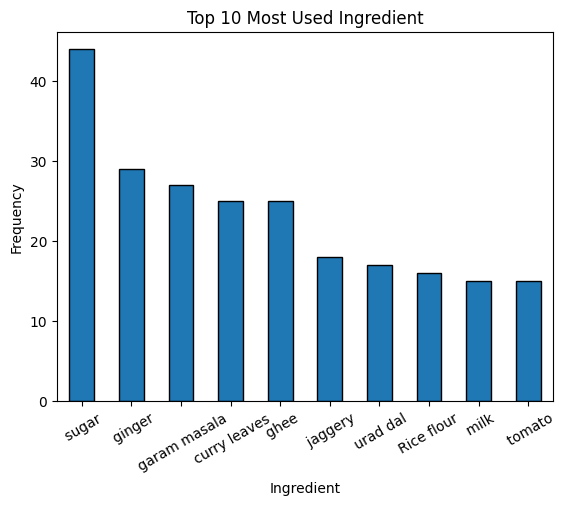

In [106]:
ingridients_most =(df['ingredients_1'].explode().value_counts()).iloc[:10]
ingridients_most.plot(kind='bar',edgecolor='black', rot=30) 
plt.title('Top 10 Most Used Ingredient')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')


In [107]:
ingridients_least =(df['ingredients_1'].explode().value_counts()).iloc[-256:]
ingridients_least

 methi leaves                1
Jowar flour                  1
 dry chilli                  1
Kala masala                  1
 pumpkin flowers             1
Fish roe                     1
Baingan                      1
 mutton                      1
Banana flower                1
 sooji                       1
 sorghum flour               1
 mawa                        1
Fermented bamboo shoot       1
 malvani masala              1
Bombay duck                  1
 chicken chunks              1
 bombay rava                 1
 mint                        1
Rice flakes                  1
Citric acid                  1
 fry                         1
Fish fillet                  1
 mustard seed                1
 chana daal                  1
 dried mango                 1
 nestle cream                1
 coconut ice                 1
Tea leaves                   1
Meat curry powder            1
Green garlic chutney         1
Green moong beans            1
 arrowroot powder            1
 dried r

Text(0, 0.5, 'Frequency')

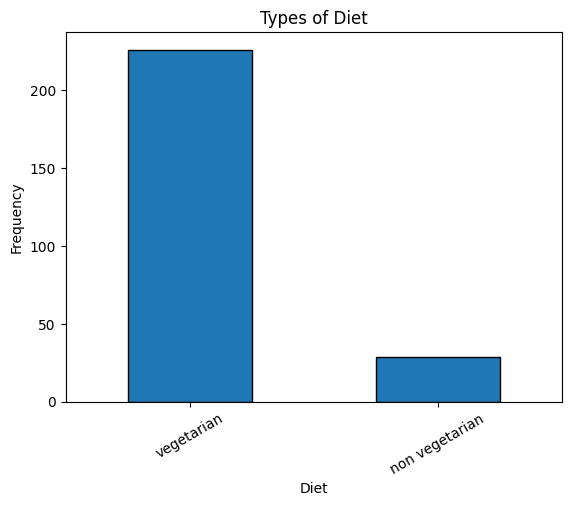

In [108]:
diet_list = df['diet'].value_counts()
diet_list.plot(kind='bar',edgecolor='black', rot=30) 
plt.title('Types of Diet')
plt.xlabel('Diet')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

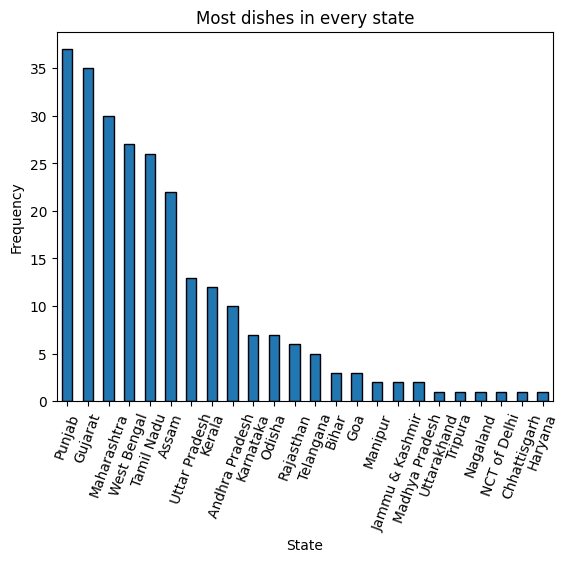

In [109]:
dishes_list_state = df['state'].value_counts()
dishes_list_state.plot(kind='bar',edgecolor='black', rot=70) 
plt.title('Most dishes in every state')
plt.xlabel('State')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

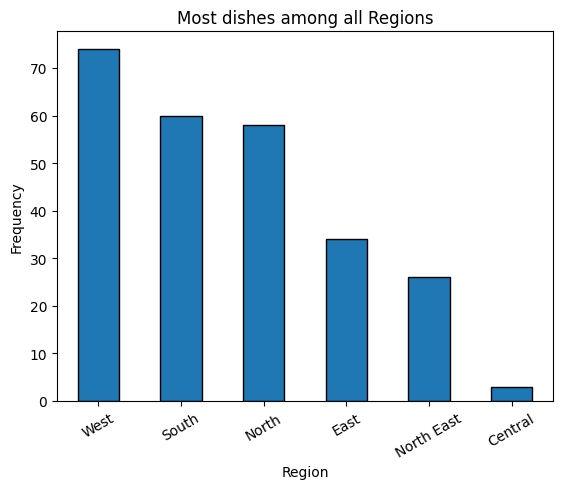

In [110]:
region_list_state = df['region'].value_counts()
region_list_state.plot(kind='bar',edgecolor='black', rot=30) 
plt.title('Most dishes among all Regions')
plt.xlabel('Region')
plt.ylabel('Frequency')


Text(0, 0.5, 'Minutes')

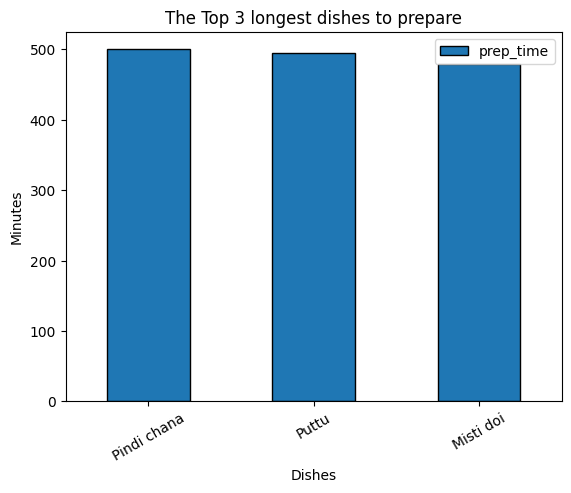

In [111]:
dishes_time = df.loc[:, ["name","cook_time","prep_time"]]
longest_prep_time = dishes_time.loc[:, ["name","prep_time"]].sort_values('prep_time', ascending=False).iloc[:3]
longest_prep_time.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('The Top 3 longest dishes to prepare')
plt.xlabel('Dishes')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

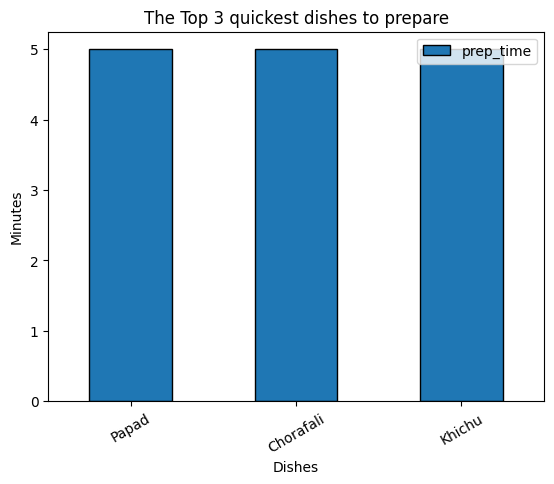

In [112]:
quickest_prep_time = dishes_time.loc[:, ["name","prep_time"]].sort_values('prep_time', ascending=True).iloc[:3]
quickest_prep_time.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('The Top 3 quickest dishes to prepare')
plt.xlabel('Dishes')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

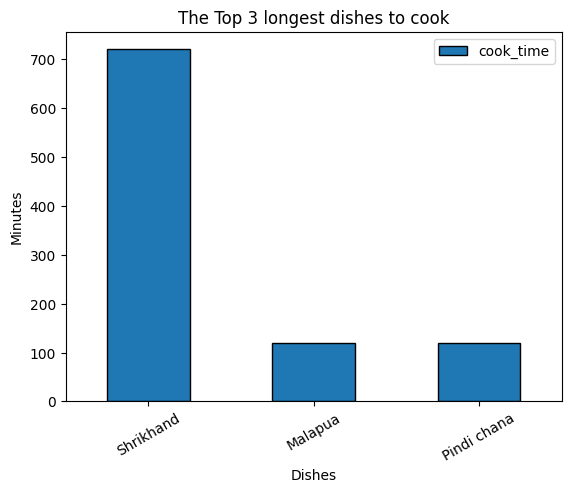

In [113]:
longest_cook_time = dishes_time.loc[:, ["name","cook_time"]].sort_values('cook_time', ascending=False).iloc[:3]
longest_cook_time.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('The Top 3 longest dishes to cook')
plt.xlabel('Dishes')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

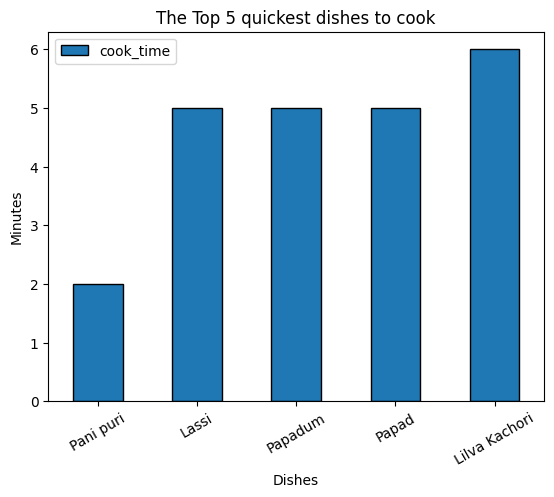

In [114]:
quickest_cook_time = dishes_time.loc[:, ["name","cook_time"]].sort_values('cook_time', ascending=True).iloc[:5]
quickest_cook_time.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('The Top 5 quickest dishes to cook')
plt.xlabel('Dishes')
plt.ylabel('Minutes')

<ipython-input-115-2fdc0e0458fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dishes_time.corr()


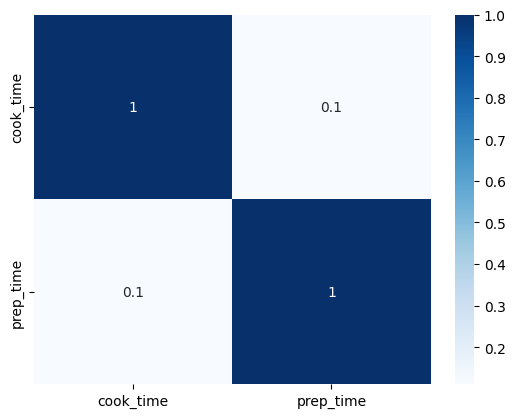

In [115]:
corr = dishes_time.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

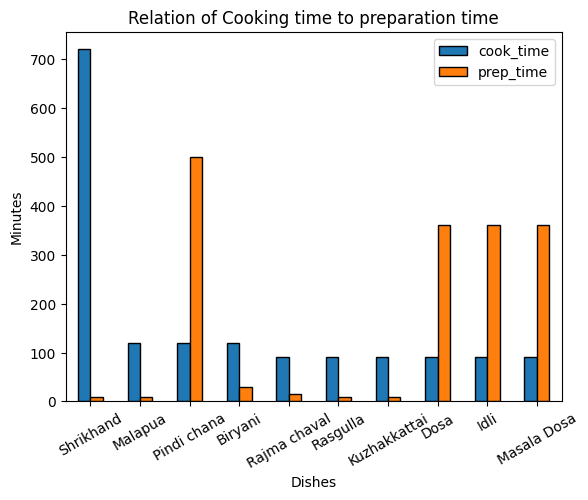

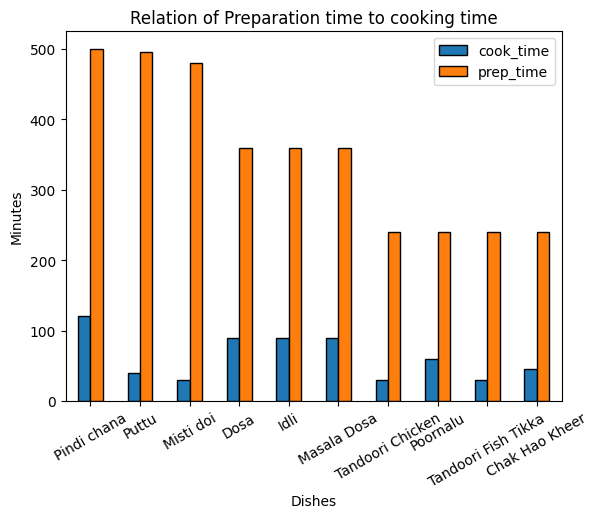

In [116]:
longest_both = dishes_time.loc[:, ["name","cook_time","prep_time"]].sort_values(by=['cook_time'], ascending=False).iloc[:10]
longest_both.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('Relation of Cooking time to preparation time')
plt.xlabel('Dishes')
plt.ylabel('Minutes')
plt.show()

longest_both = dishes_time.loc[:, ["name","cook_time","prep_time"]].sort_values(by=['prep_time'], ascending=False).iloc[:10]
longest_both.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('Relation of Preparation time to cooking time')
plt.xlabel('Dishes')
plt.ylabel('Minutes')
plt.show()

Even though cook_time and prep_time have perfectly positive linear correlation.There is no guarantee that it will affect each other outcomes.

Graph shows that even if the dishes is longer to prepare, the cooking time can be short. Same in cooking time, the longest cooking time can be prepared in a short period of time.

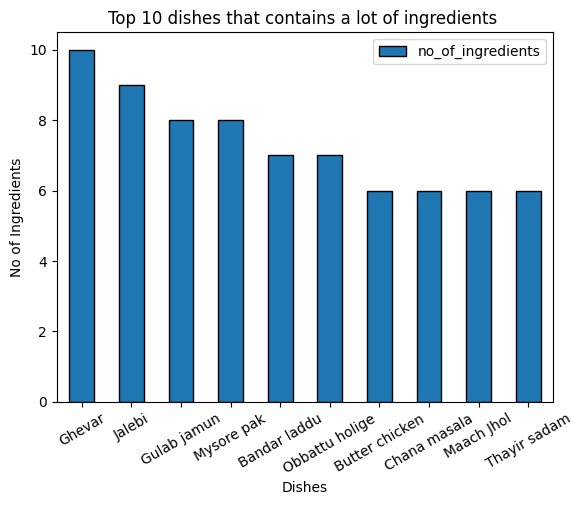

In [117]:
dishes_most_ing = df.loc[:, ["name","no_of_ingredients"]]
dishes_most_ing = dishes_most_ing.sort_values(by=['no_of_ingredients'], ascending=False).iloc[:10]
dishes_most_ing.set_index('name').plot(kind='bar',edgecolor='black', rot=30) 
plt.title('Top 10 dishes that contains a lot of ingredients ')
plt.xlabel('Dishes')
plt.ylabel('No of Ingredients')
plt.show()

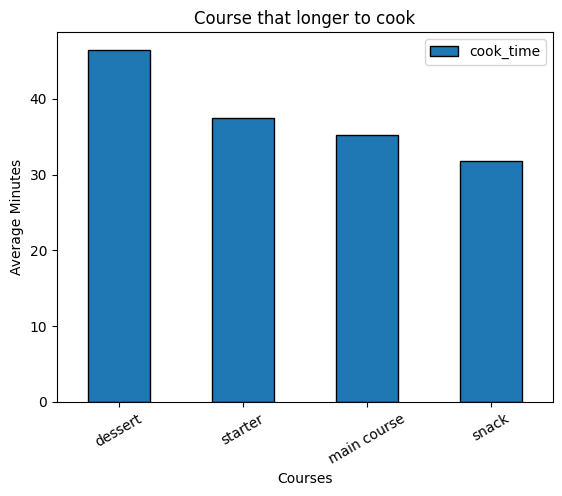

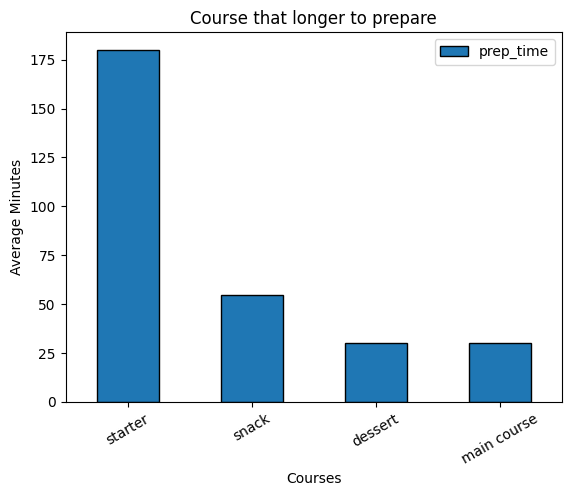

In [118]:
course_cook_time = df.loc[:, ["course","cook_time"]]
course_cook = course_cook_time.groupby('course').mean().sort_values('cook_time',ascending=False)
course_cook.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Course that longer to cook')
plt.xlabel('Courses')
plt.ylabel('Average Minutes')
plt.show()

course_prep_time = df.loc[:, ["course","prep_time"]]
course_prep = course_prep_time.groupby('course').mean().sort_values('prep_time',ascending=False)
course_prep.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Course that longer to prepare')
plt.xlabel('Courses')
plt.ylabel('Average Minutes')
plt.show()

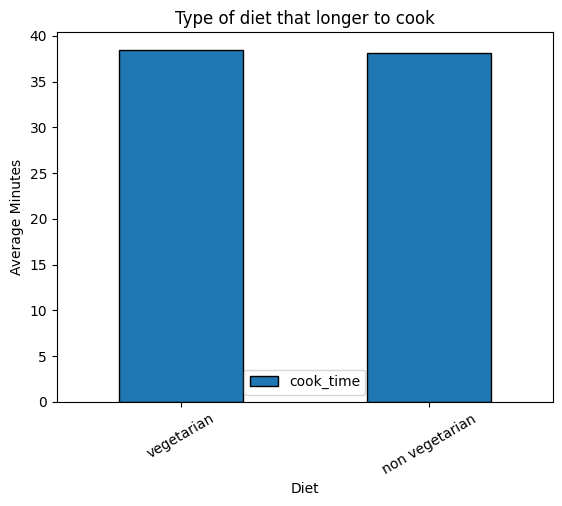

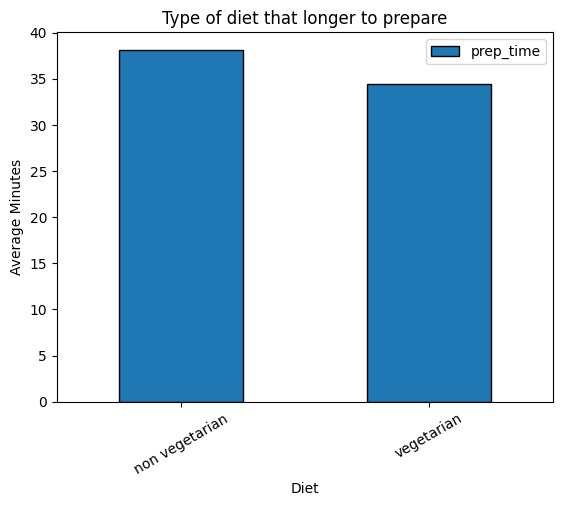

In [119]:
diet_time = df.loc[:, ["diet","cook_time"]]
diet_cook = diet_time.groupby('diet').mean().sort_values('cook_time',ascending=False)
diet_cook.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Type of diet that longer to cook')
plt.xlabel('Diet')
plt.ylabel('Average Minutes')
plt.show()

diet_time = df.loc[:, ["diet","prep_time"]]
diet_prep = diet_time.groupby('diet').mean().sort_values('prep_time',ascending=False)
diet_prep.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Type of diet that longer to prepare')
plt.xlabel('Diet')
plt.ylabel('Average Minutes')
plt.show()

In [120]:
flavor_per_region = df.loc[:, ["flavor_profile","region"]]
flavor_profile_region = flavor_per_region.groupby(["flavor_profile", "region"]).aggregate(count_cols=pd.NamedAgg(column="region", aggfunc="count"))
flavor_profile_region

count_cols
flavor_profile region                
bitter         North                2
               West                 2
sour           West                 1
spicy          Central              2
               East                10
               North               42
               North East          19
               South               41
               West                48
sweet          Central              1
               East                24
               North               14
               North East           7
               South               19
               West                23

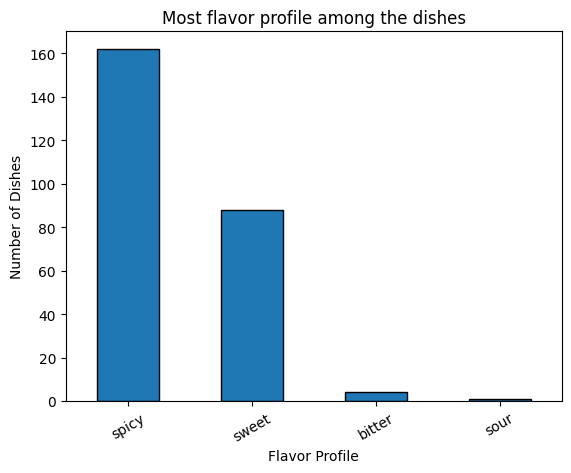

In [121]:
dominant_flavor_among_dishes = df['flavor_profile'].value_counts()
dominant_flavor_among_dishes.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Most flavor profile among the dishes')
plt.xlabel('Flavor Profile')
plt.ylabel('Number of Dishes')
plt.show()

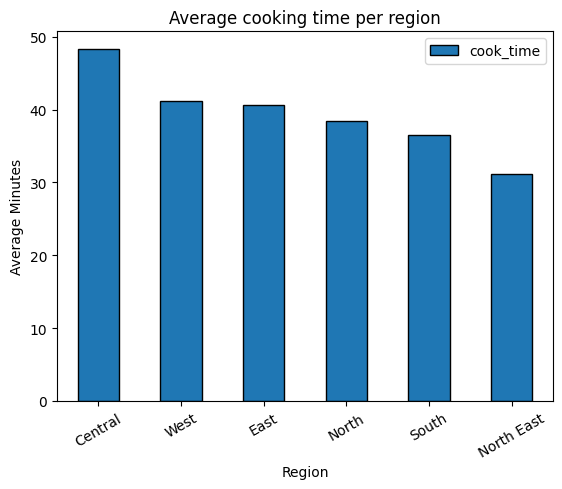

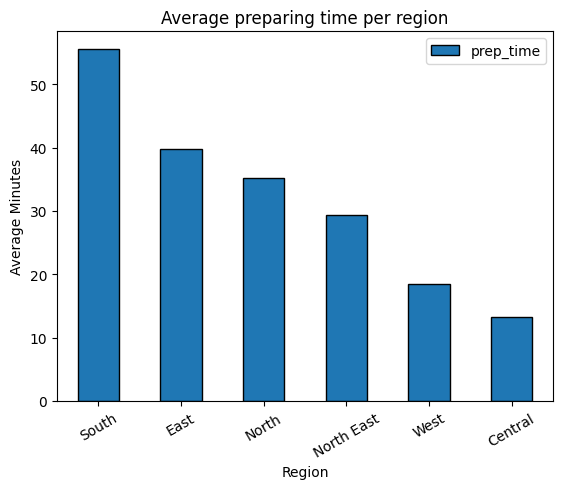

In [122]:
region_time = df.loc[:, ["region","cook_time"]]
region_cook = region_time.groupby('region').mean().sort_values('cook_time',ascending=False)
region_cook.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Average cooking time per region')
plt.xlabel('Region')
plt.ylabel('Average Minutes')
plt.show()

region_time = df.loc[:, ["region","prep_time"]]
region_prep = region_time.groupby('region').mean().sort_values('prep_time',ascending=False)
region_prep.plot(kind='bar',edgecolor='black', rot=30)
plt.title('Average preparing time per region')
plt.xlabel('Region')
plt.ylabel('Average Minutes')
plt.show()

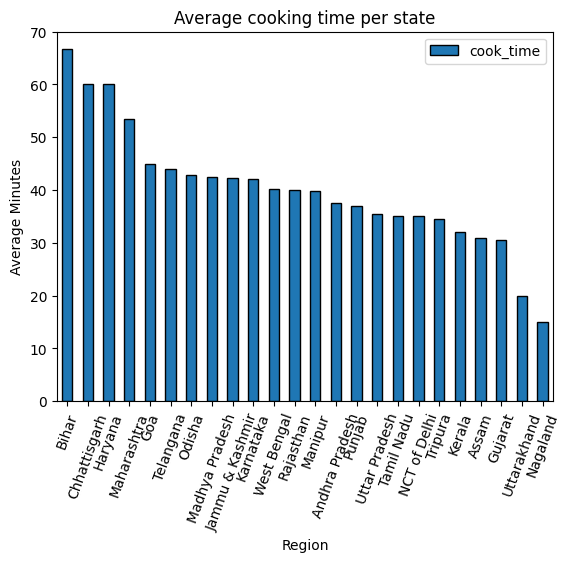

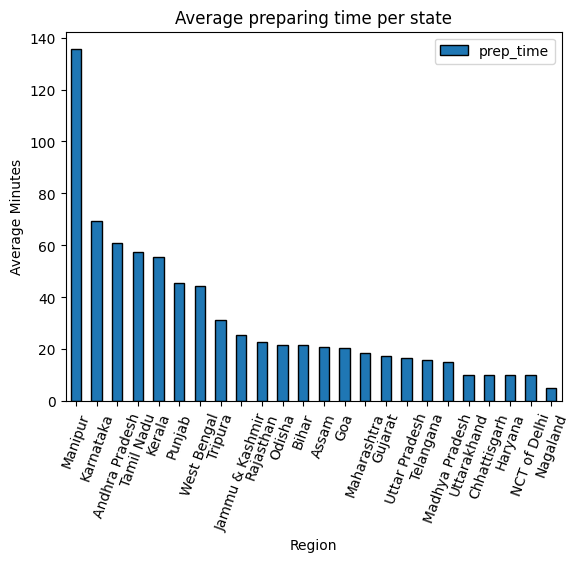

In [123]:
state_time = df.loc[:, ["state","cook_time"]]
state_cook = state_time.groupby('state').mean().sort_values('cook_time',ascending=False)
state_cook.plot(kind='bar',edgecolor='black', rot=70)
plt.title('Average cooking time per state')
plt.xlabel('Region')
plt.ylabel('Average Minutes')
plt.show()

state_time = df.loc[:, ["state","prep_time"]]
state_prep = state_time.groupby('state').mean().sort_values('prep_time',ascending=False)
state_prep.plot(kind='bar',edgecolor='black', rot=70)
plt.title('Average preparing time per state')
plt.xlabel('Region')
plt.ylabel('Average Minutes')
plt.show()

# ANOVA


In [124]:
import scipy.stats as stats

In [135]:
region_group = df.groupby('region').groups
#Extract individual groups
central = df['cook_time'][region_group['Central']]
north = df['cook_time'][region_group['North']]
north_east = df['cook_time'][region_group['North East']]
south = df['cook_time'][region_group['South']]
west = df['cook_time'][region_group['West']]
east = df['cook_time'][region_group['East']]

In [127]:
#Perform ANOVA on Region
stats.f_oneway(central,north,north_east,south,west,east)

F_onewayResult(statistic=0.23955751219578517, pvalue=0.9446762682025764)

The F-statistic is relatively low(0.2) and the p-value is very high (0.9 greater than the usual significance 
level of 0.05), indicating that there is insufficient evidence to reject the null hypothesis. Therefore, we conclude that there is no significant difference.

In [138]:
state_group = df.groupby('state').groups

#Extract individual groups
state1 = df['cook_time'][state_group['Andhra Pradesh']]
state2 = df['cook_time'][state_group['Assam']]
state3 = df['cook_time'][state_group['Bihar']]
state4 = df['cook_time'][state_group['Chhattisgarh']]
state5 = df['cook_time'][state_group['Goa']]
state6 = df['cook_time'][state_group['Haryana']]
state7 = df['cook_time'][state_group['Jammu & Kashmir']]
state8 = df['cook_time'][state_group['Karnataka']]
state9 = df['cook_time'][state_group['Kerala']]
state10 = df['cook_time'][state_group['Madhya Pradesh']]
state11 = df['cook_time'][state_group['Maharashtra']]
state12 = df['cook_time'][state_group['Manipur']]
state13 = df['cook_time'][state_group['NCT of Delhi']]
state14 = df['cook_time'][state_group['Nagaland']]
state15 = df['cook_time'][state_group['Odisha']]
state16 = df['cook_time'][state_group['Punjab']]
state17 = df['cook_time'][state_group['Rajasthan']]
state18 = df['cook_time'][state_group['Tamil Nadu']]
state19 = df['cook_time'][state_group['Telangana']]
state20 = df['cook_time'][state_group['Tripura']]
state21 = df['cook_time'][state_group['Uttar Pradesh']]
state22 = df['cook_time'][state_group['Uttarakhand']]
state23 = df['cook_time'][state_group['West Bengal']]
state24 = df['cook_time'][state_group['Gujarat']]

#Perform ANOVA between cooking time and state
stats.f_oneway(state1,state2,state3,state4,state5,state6,state7,state8,state9,state10,state11,state12,state13,state14,state15,state16,state17,state18,state19,state20,state21,state22,state23,state24)

F_onewayResult(statistic=0.3012184254252247, pvalue=0.9993587985648199)

Same goes here, the F-statistic is relatively low (0.3) and the p-value is very high(0.99), indicating that there is insufficient evidence to reject the null hypothesis. Also, we conclude that there is no significant difference.

In [137]:
flavor_group = df.groupby('flavor_profile').groups

#Extract individual groups
bitter = df['cook_time'][flavor_group['bitter']]
sour = df['cook_time'][flavor_group['sour']]
spicy = df['cook_time'][flavor_group['spicy']]
sweet = df['cook_time'][flavor_group['sweet']]

#Perform ANOVA between cooking time and flavor profile
stats.f_oneway(bitter,sour,spicy,sweet)

F_onewayResult(statistic=1.464800206864994, pvalue=0.22465016294583817)

The F-statistic is moderately high (1.45) and the p-value is relatively high (0.22), indicating that there is some evidence to suggest that there may be a difference between the means of the groups being compared, but this evidence is not strong enough to reject the null hypothesis. Therefore, we cannot conclude that there is a significant difference between the two groups.

In [134]:
#Performing t-test between cooking time and no of ingredients
t_stat, p_value = stats.ttest_ind(df['cook_time'],df['no_of_ingredients'])
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 11.629232740118958
p-value: 7.03201287979701e-28


In this case, the t-statistic is very large and the p-value is extremely small (less than 0.05), indicating that there is strong evidence to suggest that the means of the two groups are different and that this difference is unlikely to 
have occurred by chance. Therefore, we can conclude that there is a significant difference between the means of the two groups being compared